In [7]:
#import os
#os.chdir('../')

In [9]:
# Modify the sys.path
import sys
sys.path.append(r"C:\Users\Alice\Desktop\Code\eptic\src")

# Import the necessary functions
from db_connect import get_database_config_from_json, connect_to_db

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

import hydra
from omegaconf import DictConfig

import mariadb
import json

Notebook to figure out what's wrong with the "duration" field of some languages

In [24]:
hydra.core.global_hydra.GlobalHydra.instance().clear()

In [28]:
from hydra import initialize, compose

# Use the 'initialize' and 'compose' functions for Hydra
config_dir_path = r"C:\Users\Alice\Desktop\Code\eptic\config"

with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name='main.yaml')  # Adjust this if your filename differs

config_data = get_database_config_from_json(cfg.db.credentials)
print(f"Connecting to database: {config_data['name']}")
conn = connect_to_db(config_data)

sql_query = "SELECT * FROM texts"
df = pd.read_sql_query(sql_query, conn)

output_path = "texts_dataframe.xlsx"
df.to_excel(output_path, index=False)

df  # Display the dataframe

Connecting to database: skeptic


,id,event_id,subtitled_text,plain_text,sentence_split_text,lang,interpreter_id,source_target,spoken_written,word_count,duration,status,video,notes,user_id,created,modified,recycled
0,18,1,None,Bardzo dziękuję Panie Przewodniczący! Niektórz...,"<?xml version=""1.0""?>\n<xml>\n <text>\n <p...",pl,NaN,TT,SP,168,NaN,draft,-1,,3,2019-02-20 17:17:24,2019-02-20 17:17:24,0
1,19,2,,Mam uwagi wstępne. 5 krótkich punktów. 27 styc...,"<?xml version=""1.0""?>\n<xml>\n <text>\n <p...",pl,NaN,ST,SP,302,NaN,draft,-1,,3,2019-02-20 20:57:19,2019-03-01 12:19:56,0
2,23,1,,"Merci monsieur le Président, ehm il s'agissait...","<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fr,NaN,TT,SP,173,100.0,draft,-1,,2,2019-02-21 18:01:12,2019-02-22 09:31:48,0
3,24,1,None,"Monsieur le Président, vous êtes au courant qu...","<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fr,NaN,TT,WR,137,NaN,draft,-1,,2,2019-02-21 18:01:36,2019-02-21 18:01:38,0
4,25,2,,I have some information to give you. Five shor...,"<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",en,NaN,TT,SP,370,NaN,draft,-1,,2,2019-02-21 18:12:57,2019-02-21 18:13:13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1145,60,"1\r\n00:00:09,040 --> 00:00:10,626\r\n<s id=""1...",Rouva puhemies. Serbian EU-jäsenyystie menee e...,"<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fi,5.0,TT,SP,1,71.0,submitted,-1,,21,2022-05-19 23:10:51,2022-10-25 16:52:31,0
977,1146,61,"1\r\n00:00:08,386 --> 00:00:10,093\r\n<s id=""1...","Kiitos, puhemies. Hyvät naiset ja herrat. Asso...","<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fi,5.0,TT,SP,1,102.0,submitted,-1,,21,2022-10-26 11:47:58,2022-10-26 16:38:17,0
978,1147,61,None,"Arvoisa puhemies, vakautus- ja assosiaatiosopi...","<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fi,NaN,TT,WR,1,NaN,submitted,-1,,21,2022-10-26 11:52:52,2022-10-26 11:53:25,0
979,1148,62,"1\r\n00:00:10,386 --> 00:00:12,280\r\n<s id=""1...","Kiitos, rouva puhemies. Olen samaa mieltä niid...","<?xml version=""1.0""?>\r\n<xml>\r\n <text>\r\n...",fi,5.0,TT,SP,1,129.0,submitted,-1,,21,2022-10-26 15:13:09,2022-10-26 16:19:19,0


In [5]:
# Define sql query
sql_query = """
SELECT t.*, a.*, e.*, s.*
FROM texts t
JOIN alignments a ON t.id = a.id
JOIN events e ON t.event_id = e.id
JOIN speakers s ON e.speaker_id = s.id
JOIN users u ON t.user_id = u.id
JOIN interpreters i ON t.interpreter_id = i.id
"""

# Execute the query and read the result into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Specify the output file path
output_path = "merged_data_v3.xlsx"

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)

In [12]:
# Define sql query
sql_query = """
SELECT *
FROM texts
WHERE id = 57
"""

# Execute the query and read the result into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Specify the output file path
output_path = "filtered_data.xlsx"

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)


In [ ]:
def session_clear(exception=None):
    Session.remove()
    if exception and Session.is_active:
        Session.rollback()

In [20]:
# Define sql query to select all rows from the interpreters table
sql_query = """
SELECT *
FROM texts
"""
# Specify the output file path for the interpreters data
output_path = "events_data.xlsx"

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)

In [ ]:
from sqlalchemy import create_engine

# Assuming you have a database URL
engine = create_engine('your_database_url')

# Connect to the database
with engine.connect() as conn:
    # Rollback any potentially pending transaction
    conn.execution_options(isolation_level="AUTOCOMMIT")
    df = pd.read_sql_query(sql_query, conn)

# Continue with your code to export to Excel
df.to_excel(output_path, index=False)

In [12]:
session.rollback()

NameError: name 'session' is not defined

In [16]:
# Define sql query
sql_query = """
SELECT lang, SUM(word_count) as word_counts
FROM texts
GROUP BY lang
"""

# Execute the query and read the result into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Specify the output file path
output_path = "aggregated_data_by_language.xlsx"

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)


PendingRollbackError: Can't reconnect until invalid transaction is rolled back.  Please rollback() fully before proceeding (Background on this error at: https://sqlalche.me/e/20/8s2b)

In [19]:
# Define sql query
sql_query = """
SELECT lang, SUM(duration) as total_durations
FROM texts
GROUP BY lang
"""

# Execute the query and read the result into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Specify the output file path
output_path = "aggregated_data_by_language.xlsx"

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)


In [20]:
df

,lang,total_durations
0,de,NaN
1,en,12807.0
2,fi,7442.0
3,fr,6476.0
4,hu,471.0
5,it,11118.0
6,pl,NaN
7,sl,NaN


In [12]:
# Define the SQL query to fetch all columns for rows where lang is "fi"
sql_query = """
SELECT * 
FROM texts
WHERE lang = 'fi'
"""

# Execute the query and read the result into a DataFrame
df_fi = pd.read_sql_query(sql_query, conn)

# Specify the output file path
output_path = "texts_in_finnish.xlsx"

# Export the DataFrame to an Excel file
df_fi.to_excel(output_path, index=False)


In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation

# Ensure that the punkt tokenizer models are downloaded for nltk
nltk.download('punkt')

# 1. Fetch all rows from the plain_text field of the texts table where lang is "fi"
sql_query = """
SELECT plain_text 
FROM texts
WHERE lang = 'fi'
"""
df_fi = pd.read_sql_query(sql_query, conn)

# 2. Tokenize and remove punctuation
def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    # Filter out punctuation
    return [word for word in tokens if word not in punctuation]

df_fi['tokens'] = df_fi['plain_text'].apply(tokenize_and_filter)

# 3. Count the words for each row of plain_text
df_fi['word_counts'] = df_fi['tokens'].apply(len)

# 4. Calculate the total word count for all Finnish texts
total_word_count = df_fi['word_counts'].sum()

print(f"Total words in all Finnish texts: {total_word_count}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alice\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Total words in all Finnish texts: 24096


In [16]:
# Update the 'word_counts' field for rows where 'lang' is "fi"
df.loc[df['lang'] == 'fi', 'word_counts'] = 24096


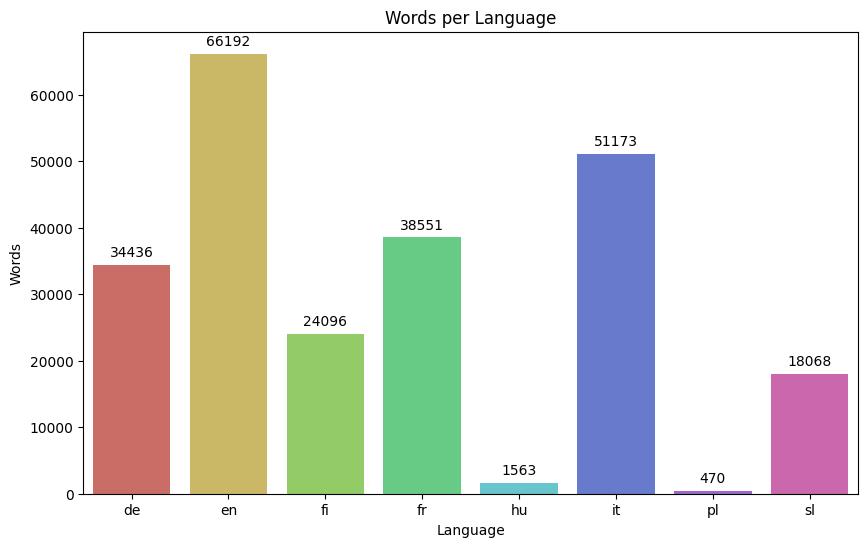

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_language_counts(df: pd.DataFrame, output_path: str):
    # Create a color palette
    palette = sns.color_palette("hls", len(df["lang"]))

    # Create a bar chart
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x="lang", y="word_counts", data=df, hue="lang", palette=palette, legend=False)

    # Annotate each bar with its respective count
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    plt.title("Words per Language")
    plt.ylabel("Words")
    plt.xlabel("Language")

    plt.savefig(output_path)
    plt.show()

# You've mentioned that df already contains the result, so you can directly use:
output_path = os.path.join(cfg.outputs.graphs, "word_counts.png")
plot_language_counts(df, output_path)
